``````{admonition} How do I set up an environment with the yml file used in this chapter?
:class: dropdown

`````{tab-set}
   
````{tab-item} Steps
```{include} ../_static/default_text_env_setup.md
```
````

````{tab-item} yml
```{literalinclude} gene_regulatory_networks_atac.yml
:language: yaml
```
````

`````

``````

# Conversion of muon objects to Seurat objects to use in downstream analysis

As we saw in the introduction, there are some downstream analyses that are currently only available in R. In this notebook, we therefore want to showcase how you can convert a muon object into a Seurat object for downstream analysis using Signac.

In [1]:
.libPaths(c("/home/icb/laura.martens/miniconda3/envs/best_practices/lib/R/library", "/home/icb/laura.martens/miniconda3/envs/signac/lib/R/library"))

## Environment setup

We load the R libraries `Signac` and `Seurat` to handle scATAC-seq data in R. Furthermore, we need to load the annotation for our reference genome. In this example, we load the annotation for human and the `hg38` reference genome. 

In [10]:
library(MuDataSeurat)# to read in muon object and convert to Seurat
library(Signac) 
library(Seurat)
library(stringr)

library(EnsDb.Hsapiens.v86)

Warning message:
"package 'stringr' was built under R version 4.2.2"


## Load data

With Signac, we have the possibility to visualize the coverage of the features or perform other analysis like footprinting. For some of these downstream analysis, it is necessary to add the fragment file to the Seurat object which we specify here with `fragmen_file`

In [3]:
fragment_file <- "/lustre/groups/ml01/datasets/projects/20220323_neurips21_bmmc_christopher.lance/multiome/aggr_donors/atac_fragments.tsv.gz"
adata_file <- "/lustre/groups/ml01/code/laura.martens/scATAC_pipelines/src/best_practices/multiome_donor_s4d8_pp_test.h5mu" #"/lustre/groups/ml01/workspace/christopher.lance/mm_best/src/scATAC/muon_data/neurips_qc_filtered_allsamp.h5ad"

### Read in mudata object

In [4]:
atac <- MuDataSeurat::ReadH5MU(adata_file)

Warning message in missing_on_read("/var", paste0("global variables metadata (", :
"Missing on read: /var. Seurat does not support global variables metadata (gene_ids, feature_types, genome, interval)."
Warning message in read_layers_to_assay(h5[["mod"]][[mod]], mod):
"The var_names from modality gene_activity have been renamed as feature names cannot contain '_'. E.g. gene_activity:MIR1302-2HG -> gene-activity:MIR1302-2HG."
as(<dsCMatrix>, "dgCMatrix") is deprecated since Matrix 1.5-0; do as(., "generalMatrix") instead

Warning message in missing_on_read(paste0("/mod", mod, "/varp"), "pairwise annotation of variables"):
"Missing on read: /modrna/varp. Seurat does not support pairwise annotation of variables."
Warning message in missing_on_read(paste0("/mod", mod, "/varp"), "pairwise annotation of variables"):
"Missing on read: /modatac/varp. Seurat does not support pairwise annotation of variables."
Warning message in missing_on_read(paste0("/mod", mod, "/varp"), "pairwise annotation 

In [5]:
atac

An object of class Seurat 
220291 features across 14710 samples within 3 assays 
Active assay: rna (36601 features, 0 variable features)
 2 other assays present: atac, gene_activity
 2 dimensional reductions calculated: LSI, UMAP

We have successfully loaded the muon object into R and it has been converted to a Seurat object with three assays `atac`, `rna` and `gene_activity`. The dimensionality reductions and metadata have also been transferred. 

In [6]:
head(atac[[]])

,orig.ident,nCount_rna,nFeature_rna,nCount_atac,nFeature_atac,nCount_gene_activity,nFeature_gene_activity,n_features_per_cell,total_fragment_counts,log_total_fragment_counts,⋯,n_features_per_cell.1,total_fragment_counts.1,log_total_fragment_counts.1,nucleosome_signal.1,nuc_signal_filter.1,tss_score.1,site.1,donor.1,sample.1,leiden.1
,<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
AAACAGCCAAGCTTAT-14,SeuratProject,1707,1128,3588,1797,2738,1409,1799,3591,3.555215,⋯,1799,3591,3.555215,0.6643357,NS_PASS,3.521329,site4,donor8,s4d8,4
AAACAGCCATGAAATG-14,SeuratProject,1409,479,5056,2552,3965,1957,2556,5062,3.704322,⋯,2556,5062,3.704322,0.6542056,NS_PASS,2.296477,site4,donor8,s4d8,10
AAACAGCCATGTTTGG-14,SeuratProject,1666,1077,7110,3360,5105,2495,3361,7112,3.851992,⋯,3361,7112,3.851992,0.6789298,NS_PASS,12.890983,site4,donor8,s4d8,3
AAACATGCAACGTGCT-14,SeuratProject,882,641,7569,3586,5397,2565,3591,7578,3.879555,⋯,3591,7578,3.879555,1.0609319,NS_PASS,4.689176,site4,donor8,s4d8,6
AAACATGCAATATAGG-14,SeuratProject,325,277,8550,4005,6500,2932,4006,8551,3.932017,⋯,4006,8551,3.932017,0.9504644,NS_PASS,4.600777,site4,donor8,s4d8,3
AAACATGCAATTAACC-14,SeuratProject,1704,1083,6993,3268,5061,2450,3269,6995,3.844788,⋯,3269,6995,3.844788,0.7665505,NS_PASS,6.894277,site4,donor8,s4d8,0


We verify that the correct embedding and clustering has been added using `DimPlot`.

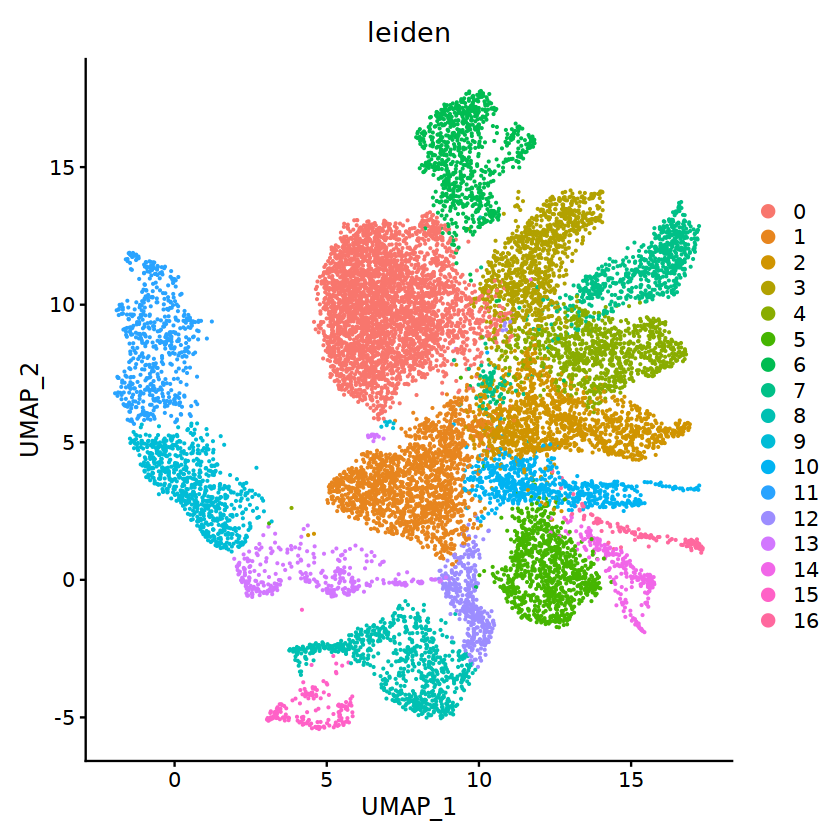

In [7]:
DimPlot(atac, group.by='leiden')

Seurat by default groups its cells by `idents` which we can set to our cell types or clustering

In [34]:
Idents(atac) <- atac[[]]$leiden

### Convert Seurat assay to chromatin assay

Loading using `MuDataSeurat` does not support features with the same name in different assays (the same gene name for `rna` and `gene_activity`), which is why we had to add the assay name to the feature with `assay:feature`. Additionally, the `atac` assay is still a regular Seurat `Assay` and not a Signac `ChromatinAssay` which we need for chromatin specific downstream analyses. 

In [8]:
split_assay_names <- function(assay, sep=':'){
    #Function to split the assay name from the feature name
    new_names <- str_split(rownames(assay), sep, simplify=TRUE, n=2)[, 2]
    rownames(assay) <- new_names
    return(assay)
}

We will add gene annotation to our `ChromatinAssay`. You have to make sure that the chromosome names in your annotation match the names in your fragment files (so either `chr1` or `1`). See `?seqlevelsStyle` to see the different options.

In [ ]:
# extract gene annotations from EnsDb
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v86)
seqlevelsStyle(annotations) <- 'UCSC'
genome(annotations) <- "hg38"

In [11]:
data <- split_assay_names(atac[['atac']]@data)

In [25]:
chrom_assay <- CreateChromatinAssay(
  data=data,
  sep = c(":", "-"), #seperator of adata$var_names
  genome = 'hg38', #used reference genome
  fragments = fragment_file, 
  annotation = annotations
)

Computing hash



In [27]:
atac[['atac']] <- chrom_assay

Finally, we can check if we can plot all features in all assays

In [31]:
DefaultAssay(atac) <- 'atac'

Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."


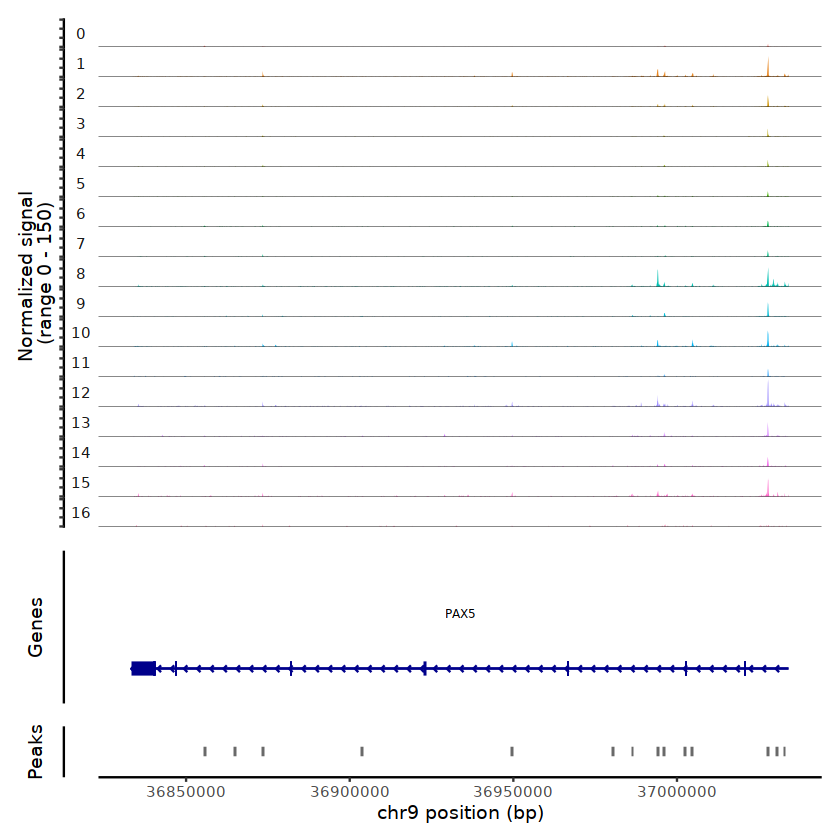

In [38]:
cov_plot <- CoveragePlot(
  object = atac,
  region = "PAX5",
  annotation = TRUE,
  peaks = TRUE, 
)
cov_plot

In [39]:
DefaultAssay(atac) <- 'rna'

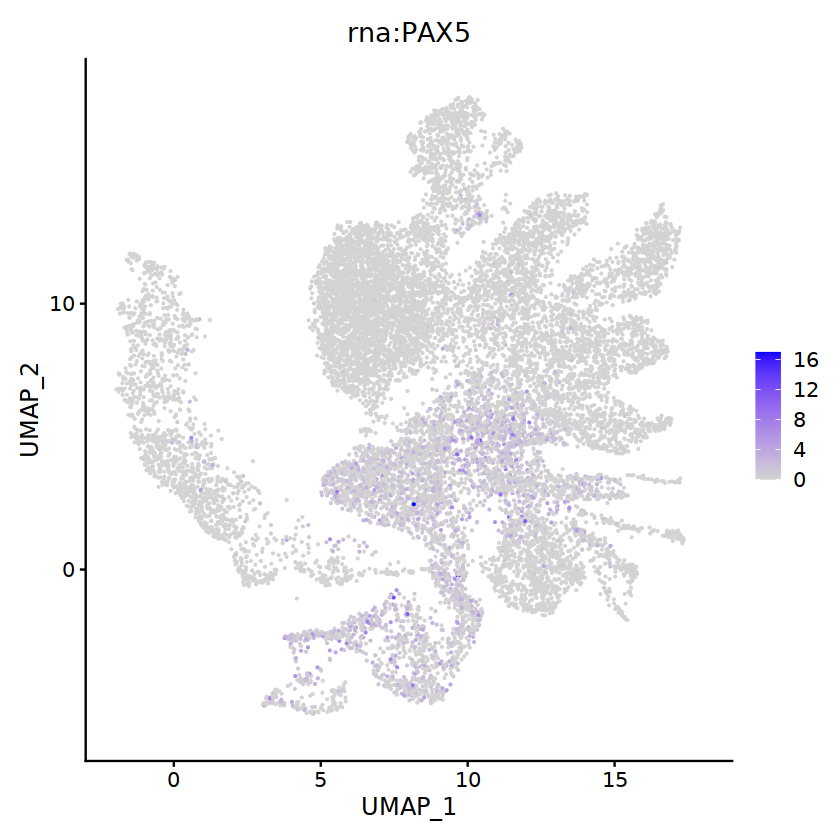

In [42]:
FeaturePlot(atac, 'rna:PAX5')

In [43]:
DefaultAssay(atac) <- 'gene_activity'

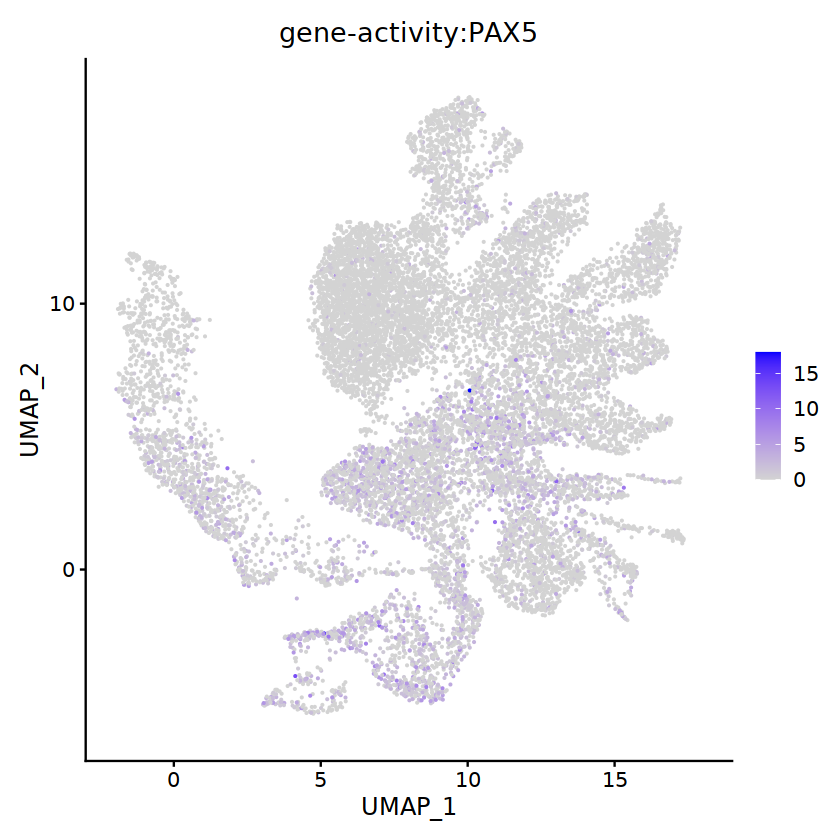

In [47]:
FeaturePlot(atac, 'gene-activity:PAX5')